### 1. Import Libraries

In [67]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.pipeline import Pipeline
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### 2. Load the Dataset

In [15]:
df = pd.read_csv("dataset.csv")  # Replace with your CSV file


In [16]:
df.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


### 3. Explore the Data

In [20]:
df['fasting blood sugar'].value_counts()

fasting blood sugar
0    936
1    254
Name: count, dtype: int64

In [24]:
df['cholesterol'].value_counts()

cholesterol
0      172
254     16
211     13
204     13
234     13
      ... 
316      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [25]:
df['resting ecg'].value_counts()

resting ecg
0    684
2    325
1    181
Name: count, dtype: int64

In [27]:
df['exercise angina'].value_counts()

exercise angina
0    729
1    461
Name: count, dtype: int64

In [9]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None
               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.

In [28]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

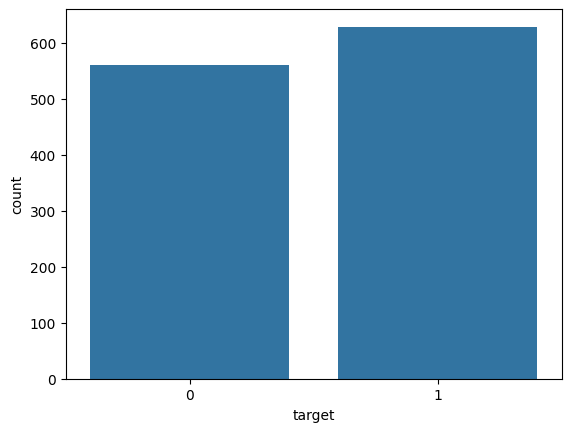

In [10]:
# Check target distribution
sns.countplot(x='target', data=df)
plt.show()


In [31]:
# Z-score
outliers = []
def detect_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [33]:
detect_outliers(df['age'])

[]

In [34]:
detect_outliers(df['sex'])

[]

In [35]:
detect_outliers(df['chest pain type'])

[]

In [36]:
detect_outliers(df['resting bp s'])

[190, 200, 200, 200, 0, 190, 200, 192, 200, 192]

In [42]:
def remove_outliers_single_column(series, threshold=3):
    z_scores = np.abs(stats.zscore(series))
    return series[z_scores < threshold]


In [44]:
remove_outliers_single_column(df['resting bp s'], threshold=3)

0       140
1       160
2       130
3       138
4       150
       ... 
1185    110
1186    144
1187    130
1188    130
1189    138
Name: resting bp s, Length: 1180, dtype: int64

In [46]:
detect_outliers(df['resting bp s'])

[190,
 200,
 200,
 200,
 0,
 190,
 200,
 192,
 200,
 192,
 190,
 200,
 200,
 200,
 0,
 190,
 200,
 192,
 200,
 192,
 190,
 200,
 200,
 200,
 0,
 190,
 200,
 192,
 200,
 192]

### 4. Data Preprocessing
No missing values → good to go

Standardize numeric columns for model performance.

In [4]:
X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [64]:
X_scaled

array([[-1.46672783,  0.55599543, -1.31835093, ..., -0.79521891,
        -0.84979236, -1.02321701],
       [-0.50460037, -1.79857595, -0.24893198, ..., -0.79521891,
         0.07111913,  0.61558278],
       [-1.78743698,  0.55599543, -1.31835093, ..., -0.79521891,
        -0.84979236, -1.02321701],
       ...,
       [ 0.35062404,  0.55599543,  0.82048698, ...,  1.25751537,
         0.25530143,  0.61558278],
       [ 0.35062404, -1.79857595, -1.31835093, ..., -0.79521891,
        -0.84979236,  0.61558278],
       [-1.68053393,  0.55599543, -0.24893198, ..., -0.79521891,
        -0.84979236, -1.02321701]], shape=(1190, 11))

### 5. Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

### 6. Model Training (Logistic Regression)

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### 7. Model Evaluation

In [7]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8613445378151261

Confusion Matrix:
 [[ 90  17]
 [ 16 115]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



### 8. Predict for New Data

In [49]:
print(scaler.n_features_in_)  # See how many features scaler expects

11


In [66]:
print(model.n_features_in_)

11


In [51]:
feature_names = X.columns  # Save the order and number of features

In [54]:
print(X.head())

   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  
0            0             172                0      0.0         1  
1            0             156                0      1.0         2  
2            1              98                0      0.0         1  
3            0             108                1      1.5         2  
4            0             122                0      0.0         1  


In [55]:
new_patient = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 1]])

new_patient_scaled = scaler.transform(new_patient)
prediction = model.predict(new_patient_scaled)

print("Heart Disease" if prediction[0] == 1 else "Normal")

Heart Disease


d:\Internship Project\Heart Disease\heart_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [59]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [60]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)